# Lista 10

## Nome: Jorge Lucas
## Matricula: 402119

## Importando bibliotecas

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import ensemble

## Importando dataframe

In [35]:
df = pd.read_csv("diabetes.csv",delimiter=',')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Questão 01 - Separando em treino e teste.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome',axis=1), df['Outcome'], test_size=0.2, random_state= 42)

## Questão 02 - Criando modelo de arvore de decisão

In [37]:
dt = tree.DecisionTreeClassifier(random_state=42)

dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

### 2.1 - Importancia das features

In [38]:
print(dt.feature_importances_,sep = "\n")

[0.05748153 0.31422474 0.14767907 0.06116378 0.06625279 0.17070035
 0.08328237 0.09921536]


### 2.2 - Plot da árvore decisão

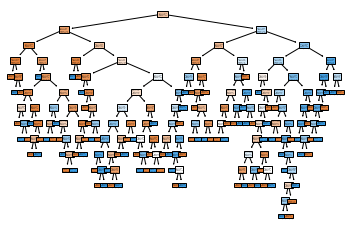

In [28]:
tree.plot_tree(dt, filled=True);

### 2.3 - F1 Score

In [29]:
# Predict Treino
train_pred = dt.predict(X_train)

# Predict Teste
test_pred = dt.predict(X_test)


In [30]:
# Resultado Treino
dt_train_f1_score = metrics.f1_score(y_train, train_pred)

print('F1-Score com o treino', dt_train_f1_score)


# Resultado Teste
dt_test_f1_score = metrics.f1_score(y_test, test_pred)

print('F1-Score com o teste', dt_test_f1_score)

F1-Score com o treino 1.0
F1-Score com o teste 0.6722689075630253


## Questão 03

In [31]:
lrModel = LogisticRegression(penalty='l2', solver='liblinear', C=0.001, random_state=42)

dtModel = DecisionTreeClassifier(random_state=42)

knnModel = KNeighborsClassifier(n_neighbors=1)

model_labels = ['Logistic regression', 'Decision tree', 'KNN']


print('F1_Score dos modelos:\n')
for model, label in zip([lrModel, dtModel, knnModel], model_labels):
    model.fit(X_train, y_train)
    y_model = model.predict(X_test)
    scores = (metrics.f1_score(y_test, y_model))
    print("F1_Score: %0.2f [%s]" % (scores, label))

F1_Score dos modelos:

F1_Score: 0.45 [Logistic regression]
F1_Score: 0.67 [Decision tree]
F1_Score: 0.58 [KNN]


In [32]:
mvModel = ensemble.MajorityVoteClassifier(classifiers=[lrModel, dtModel, knnModel])

model_labels += ['Majority voting']
all_models = [lrModel, dtModel, knnModel, mvModel]

for model, label in zip(all_models, model_labels):
    model.fit(X_train, y_train)
    y_model = model.predict(X_test)
    scores = (metrics.f1_score(y_test, y_model))
    print("F1_Score: %0.2f [%s]" % (scores, label))

F1_Score: 0.45 [Logistic regression]
F1_Score: 0.67 [Decision tree]
F1_Score: 0.58 [KNN]
F1_Score: 0.67 [Majority voting]


## Questão 04

In [47]:
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)

ada = AdaBoostClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

rf = RandomForestClassifier(max_depth=2, random_state=42).fit(X_train, y_train)

bc_dt = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1).fit(X_train, y_train)
bc_gb = BaggingClassifier(base_estimator=gb, n_estimators=300, n_jobs=-1).fit(X_train, y_train)
bc_ada = BaggingClassifier(base_estimator=ada, n_estimators=300, n_jobs=-1).fit(X_train, y_train)
bc_rf = BaggingClassifier(base_estimator=rf, n_estimators=300, n_jobs=-1).fit(X_train, y_train)

np.mean([tree.feature_importances_ for tree in bc_dt.estimators_], axis=0)
np.mean([tree.feature_importances_ for tree in bc_gb.estimators_], axis=0)
np.mean([tree.feature_importances_ for tree in bc_ada.estimators_], axis=0)
np.mean([tree.feature_importances_ for tree in bc_rf.estimators_], axis=0)


y_pred_dt = bc_dt.predict(X_test)
y_pred_gb = bc_gb.predict(X_test)
y_pred_ada = bc_ada.predict(X_test)
y_pred_rf= bc_rf.predict(X_test)

f1_dt = metrics.f1_score(y_test, y_pred_dt)
f1_gb = metrics.f1_score(y_test, y_pred_gb)
f1_ada = metrics.f1_score(y_test, y_pred_ada)
f1_rf = metrics.f1_score(y_test, y_pred_rf)

print('Accuracy of Bagging Classifier RF: {:.3f}'.format(f1_dt))
print('Accuracy of Bagging Classifier GB: {:.3f}'.format(f1_gb))
print('Accuracy of Bagging Classifier ADA: {:.3f}'.format(f1_ada))
print('Accuracy of Bagging Classifier RF: {:.3f}'.format(f1_rf))

Accuracy of Bagging Classifier RF: 0.655
Accuracy of Bagging Classifier GB: 0.642
Accuracy of Bagging Classifier ADA: 0.610
Accuracy of Bagging Classifier RF: 0.621
